In [97]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


# set up display area to show dataframe in jupyter qtconsole

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

In [98]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

category = []
mean = []
ci_err = []

for i in range(4): 
    data = df.iloc[i]
    category.append(str(data.name))
    mean.append(round(np.mean(data), 2))
    sem = st.sem(data)
    ci = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
    ci_err.append(round(np.mean(data) - ci[0], 2))


<IPython.core.display.Javascript object>


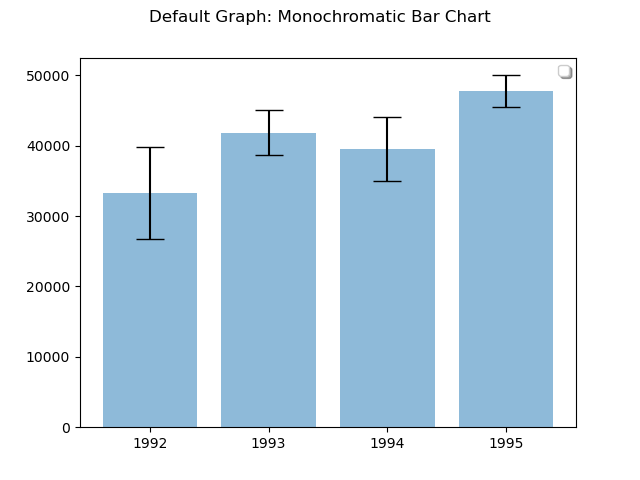

Text(0.5, 0.98, 'Default Graph: Monochromatic Bar Chart')

In [99]:
fig, ax = plt.subplots()

ax.bar(category, mean, yerr=ci_err, align='center', alpha=0.5, ecolor='black', capsize=10)

fig.suptitle('Default Graph: Monochromatic Bar Chart')


**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

<IPython.core.display.Javascript object>


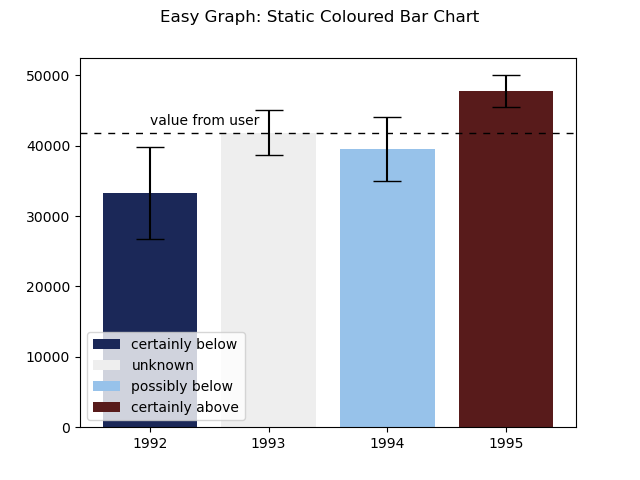

In [164]:
figA, axA = plt.subplots()

# assign colours to each bar: Blue, White, Red
user_input = mean[1] # comparison value equal to mean of 2nd bar (so it should be white)

colours = {'certainly below':'#1B2858', 
           'unknown':'#EEEEEE', 
           'possibly below':'#97C2EA', 
           'certainly above':'#581B1B'}
labels = colours.keys()


bar = axA.bar(category, mean, yerr=ci_err, align='center', color=colours.values(), ecolor='black', capsize=10)
line = axA.axhline(y=user_input,linewidth=1, color="black", dashes=[5, 5])
axA.legend(bar, ('certainly below', 'unknown', 'possibly below', 'certainly above'))
axA.text('1992',43000, 'value from user', horizontalalignment='left')

figA.suptitle('Easy Graph: Static Coloured Bar Chart')
plt.show()